In [1]:
import os
import sys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from skimage.filters import threshold_otsu
from scipy.ndimage import distance_transform_edt
from scipy.spatial import distance

In [3]:

import gudhi, gudhi.hera, gudhi.wasserstein, persim

In [4]:
#from IPython.display import display, HTML

In [5]:
import plotly
from plotly.graph_objs import graph_objs as go
import ipywidgets as widgets
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot


In [6]:
#from numba import jit, prange, double, float32,int64,int32, types

In [ ]:
#os.chdir("micelles/")

In [6]:
dat=np.load(open('Ptraj0.npy',"rb"))

In [7]:
ac = gudhi.AlphaComplex(dat)
#st = ac.create_simplex_tree()

In [8]:
st = ac.create_simplex_tree()

In [10]:
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
# We want to plot the alpha-complex with alpha=0.005 by default.
# We are only going to plot the triangles
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 0.05])

In [9]:
ac = gudhi.AlphaComplex(dat)
st = ac.create_simplex_tree()
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 0.05])

In [12]:
np.array([s[0] for s in st.get_skeleton(2)  if len(s[0]) == 2 and s[1] <= 0.05])

array([[   0,   45],
       [   0,  374],
       [   0,  377],
       ...,
       [2576, 2577],
       [2577, 2578],
       [2577, 2579]])

In [13]:
triangles

array([[  53,  505,  525],
       [  89,  712,  724],
       [ 149, 1234, 1242],
       [ 204,  205, 1628],
       [ 257,  258, 2071],
       [ 262, 2091, 2138],
       [ 325,  349,  350],
       [ 765,  766,  777],
       [ 896,  898,  900],
       [1354, 1355, 1357],
       [1438, 1439, 1440],
       [2050, 2052, 2082],
       [2152, 2156, 2198],
       [2157, 2159, 2169],
       [2222, 2223, 2224],
       [2248, 2414, 2415],
       [2328, 2330, 2332],
       [2462, 2571, 2575]])

In [14]:
#import plotly.io as pio
#pio.renderers.default = "browser"

In [15]:
#from IPython.display import display

# Optimized Single Frame

In [10]:
alpha=.025
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
b1s=np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 2 and s[1] <= alpha])
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha])


pts=go.Scatter3d(
    x = dat[:, 0],
    y = dat[:, 1],
    z = dat[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'
    
)

sfig=[pts]

linepts={0:[],1:[],2:[]}
for i in b1s:
    linepts[0].append(dat[i[0],0])
    linepts[1].append(dat[i[0],1])
    linepts[2].append(dat[i[0],2])
    linepts[0].append(dat[i[1],0])
    linepts[1].append(dat[i[1],1])
    linepts[2].append(dat[i[1],2])
    
    linepts[0].append(None)
    linepts[1].append(None)
    linepts[2].append(None)
#for i in range(3):
#        linepts[i]=np.array(linepts[i])

    
if len(linepts[0])>0:
    lins=go.Scatter3d(
        x=linepts[0],
        y=linepts[1],
        z=linepts[2],
        mode='lines',
        name='H1',
        marker=dict(
            size=3,
            color="#d55e00",                # set color to an array/list of desired values
            #colorscale='Viridis',   # choose a colorscale
            opacity=.9
        )
    )
    sfig.append(lins)
    if len(triangles)>0:
        mesh = go.Mesh3d(
            x = dat[:, 0],
            y = dat[:, 1],
            z = dat[:, 2],
            i = triangles[:, 0],
            j = triangles[:, 1],
            k = triangles[:, 2],
            color="#009e73",
            opacity=.75,
            name='H2'
        )


        sfig.append(mesh)
fig=go.Figure(sfig)
fig.show()


In [ ]:
b1s

In [ ]:
np.linalg.norm(dat[0]-dat[2])

In [ ]:
!pip install plotly --upgrade

In [ ]:
fig=go.Figure(mesh)
fig.show()

In [11]:
dgm=st.persistence()

In [12]:
dgm

[(2, (0.1522340788119905, 0.3547995667748015)),
 (2, (0.11619760548873256, 0.2673793164942422)),
 (2, (0.11123480954407795, 0.2541333022654306)),
 (2, (0.10702358477021899, 0.2339941701888504)),
 (2, (0.13598458248366116, 0.25791391946153086)),
 (2, (0.1609701517525715, 0.2727564035036562)),
 (2, (0.2108278842442534, 0.3105733939239146)),
 (2, (0.24644499001689268, 0.3314718319564675)),
 (2, (0.19600285244872495, 0.27384448161252367)),
 (2, (0.14603957998933065, 0.22301695903216645)),
 (2, (0.11333081690177543, 0.1900815274844883)),
 (2, (0.10908263979826957, 0.17433618703595383)),
 (2, (0.1850669039759222, 0.2500297826347279)),
 (2, (0.10426733710160062, 0.16908490575402996)),
 (2, (0.21317091594487275, 0.2762947762540307)),
 (2, (0.17697502122594894, 0.23760317869804892)),
 (2, (0.09944716983001656, 0.1567486714637532)),
 (2, (0.22495088896681323, 0.2812953276461516)),
 (2, (0.19050681295983807, 0.24605488804041203)),
 (2, (0.2300126627040796, 0.2849336072036843)),
 (2, (0.2261109733

usetex mode requires TeX.


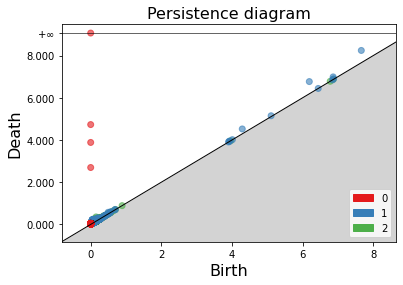

In [13]:
gudhi.plot_persistence_diagram(dgm, legend = True)
plt.show()

## Alpha slider

In [ ]:
display(HTML("<script>$('div.cell.selected').next().height(1000);</script>"))

In [14]:
lims=[[np.floor(np.min(points[:,i])),np.ceil(np.max(points[:,i]))] for i in range(3)]
alpha = widgets.FloatSlider(
    value = 0.05,
    min = 0.0,
    max = 20,
    step = 0.05,
    description = 'Alpha:',
    readout_format = '.4f'
)



b1s=np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 2 and s[1] <= alpha.value])
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha.value])


pts=go.Scatter3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'
    
)

sfig=[pts]

linepts={0:[],1:[],2:[]}
for i in b1s:
    linepts[0].append(dat[i[0],0])
    linepts[1].append(dat[i[0],1])
    linepts[2].append(dat[i[0],2])
    linepts[0].append(dat[i[1],0])
    linepts[1].append(dat[i[1],1])
    linepts[2].append(dat[i[1],2])
    
    linepts[0].append(None)
    linepts[1].append(None)
    linepts[2].append(None)
    
if len(linepts[0])>0:
    lins=go.Scatter3d(
        x=linepts[0],
        y=linepts[1],
        z=linepts[2],
        mode='lines',
        name='H1',
        marker=dict(
            size=3,
            color="#d55e00",                # set color to an array/list of desired values
            #colorscale='Viridis',   # choose a colorscale
            opacity=.9
        )
    )
    sfig.append(lins)
    if len(triangles)>0:
        mesh = go.Mesh3d(
            x = points[:, 0],
            y = points[:, 1],
            z = points[:, 2],
            i = triangles[:, 0],
            j = triangles[:, 1],
            k = triangles[:, 2],
            color="#009e73",
            opacity=.75,
            name='H2'
        )


        sfig.append(mesh)
fig=go.Figure(sfig)
fig.update_layout(width=2000,height=1000)
#fig.show()




def view_SC(alpha):
    if alpha==0:
        fig=go.Figure(sfig[0])
        fig.show()
    else:
        b1s=np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 2 and s[1] <= alpha])
        
        linepts={0:[],1:[],2:[]}
        for i in b1s:
            linepts[0].append(dat[i[0],0])
            linepts[1].append(dat[i[0],1])
            linepts[2].append(dat[i[0],2])
            linepts[0].append(dat[i[1],0])
            linepts[1].append(dat[i[1],1])
            linepts[2].append(dat[i[1],2])

            linepts[0].append(None)
            linepts[1].append(None)
            linepts[2].append(None)

        if len(linepts[0])>0:
            lins=go.Scatter3d(
                x=linepts[0],
                y=linepts[1],
                z=linepts[2],
                mode='lines',
                name='H1',
                marker=dict(
                    size=3,
                    color="#d55e00",                # set color to an array/list of desired values
                    #colorscale='Viridis',   # choose a colorscale
                    opacity=.85
                )
            )
            sfig[1]=lins
            triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha])
            if len(triangles)>0:
                mesh = go.Mesh3d(
                    x = points[:, 0],
                    y = points[:, 1],
                    z = points[:, 2],
                    i = triangles[:, 0],
                    j = triangles[:, 1],
                    k = triangles[:, 2],
                    color="#009e73",
                    opacity=.5,
                    name='H2'
                )


                sfig[2]=mesh


        fig=go.Figure(data=sfig,layout=go.Layout(width=1000,height=1000,
                                                 
                                                ))
        
        fig.show()


widgets.interact(view_SC, alpha = alpha);

interactive(children=(FloatSlider(value=0.05, description='Alpha:', max=20.0, readout_format='.4f', step=0.05)…

In [ ]:
st.get_skeleton(2)

# GPU Optimized alpha slider

In [ ]:
ac = gudhi.AlphaComplex(dat)
st = ac.create_simplex_tree()
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 0.05])


lims=[[np.floor(np.min(points[:,i])),np.ceil(np.max(points[:,i]))] for i in range(3)]
alpha = widgets.FloatSlider(
    value = 0.05,
    min = 0.0,
    max = 20,
    step = 0.05,
    description = 'Alpha:',
    readout_format = '.4f'
)



b1s=np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 2 and s[1] <= alpha.value])
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha.value])


pts=go.Scatter3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'
    
)

sfig=[pts]

linepts={0:[],1:[],2:[]}
for i in b1s:
    linepts[0].append(dat[i[0],0])
    linepts[1].append(dat[i[0],1])
    linepts[2].append(dat[i[0],2])
    linepts[0].append(dat[i[1],0])
    linepts[1].append(dat[i[1],1])
    linepts[2].append(dat[i[1],2])
    
    linepts[0].append(None)
    linepts[1].append(None)
    linepts[2].append(None)
    
if len(linepts[0])>0:
    lins=go.Scatter3d(
        x=linepts[0],
        y=linepts[1],
        z=linepts[2],
        mode='lines',
        name='H1',
        marker=dict(
            size=3,
            color="#d55e00",                # set color to an array/list of desired values
            #colorscale='Viridis',   # choose a colorscale
            opacity=.9
        )
    )
    sfig.append(lins)
    if len(triangles)>0:
        mesh = go.Mesh3d(
            x = points[:, 0],
            y = points[:, 1],
            z = points[:, 2],
            i = triangles[:, 0],
            j = triangles[:, 1],
            k = triangles[:, 2],
            color="#009e73",
            opacity=.75,
            name='H2'
        )


        sfig.append(mesh)
fig=go.Figure(sfig)
fig.show()
#((returns)(inputs))
#@jit(float32[:,:](types.Tuple(int32[:],double)[:],int32,float32),nopython=True, parallel=True, cache=True)

@jit(nopython=True, parallel=True, cache=True)
def simplexTreeGrab(stSkel,hdim,alpha):
    return np.array([stSkel[i][0] for i in prange(len(stSkel)) if len(stSkel[i][0]) == hdim and stSkel[i][1] <= alpha])
    

@jit(cache=True)
def view_SC(alpha):
    if alpha==0:
        fig=go.Figure(sfig[0])
        fig.show()
    else:
        simplexes=dict()
        for h in range(2): #b1, b2 
            simplexes[int(h)+1]=set(simplexTreeGrab(list(st.get_skeleton(int(h)+2),int(h)+2,alpha)))
        #(b1s,triangles)-> simplexes[1],simplexes[2]
        simLen={h:len(simplexes[h]) for h in simplexes.keys()}
        if len(simplexes[1])>0:
            linepts={0:[],1:[],2:[]}
            for lin in range(simLen[1]):
                for d in range(3):
                    linepts[d].append(dat[simplexes[1][lin][0],d])
                    linepts[d].append(dat[simplexes[1][lin][1],d])
                    linepts[d].append(None)
            lins=go.Scatter3d(
                x=linepts[0],
                y=linepts[1],
                z=linepts[2],
                mode='lines',
                name='H1',
                marker=dict(
                    size=3,
                    color="#d55e00",                # set color to an array/list of desired values
                    #colorscale='Viridis',   # choose a colorscale
                    opacity=.85
                )
            )
            sfig[1]=lins
            
            if len(simplexes[2])>0:
                mesh = go.Mesh3d(
                    x = points[:, 0],
                    y = points[:, 1],
                    z = points[:, 2],
                    i = simplexes[2][:, 0],
                    j = simplexes[2][:, 1],
                    k = simplexes[2][:, 2],
                    color="#009e73",
                    opacity=.5,
                    name='H2'
                )
                sfig[2]=mesh
            else:
                fig=go.Figure(sfig[:-1])
                fig.show()
                
            fig=go.Figure(sfig)
            fig.show()
            


widgets.interact(view_SC, alpha = alpha);

# GPU Optimized alpha anim

In [ ]:
ac = gudhi.AlphaComplex(dat)
st = ac.create_simplex_tree()


#points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
#triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 0.05])

res=.05

lims=[[np.floor(np.min(points[:,i])),np.ceil(np.max(points[:,i]))] for i in range(3)]
alpha = widgets.FloatSlider(
    value = 0.05,
    min = 0.0,
    max = 20,
    step = 0.05,
    description = 'Alpha:',
    readout_format = '.4f'
)






b1s=np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 2 and s[1] <= alpha.value])
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha.value])


pts=go.Scatter3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'
    
)

sfig=[pts]

linepts={0:[],1:[],2:[]}
for i in b1s:
    linepts[0].append(dat[i[0],0])
    linepts[1].append(dat[i[0],1])
    linepts[2].append(dat[i[0],2])
    linepts[0].append(dat[i[1],0])
    linepts[1].append(dat[i[1],1])
    linepts[2].append(dat[i[1],2])
    
    linepts[0].append(None)
    linepts[1].append(None)
    linepts[2].append(None)
    
if len(linepts[0])>0:
    lins=go.Scatter3d(
        x=linepts[0],
        y=linepts[1],
        z=linepts[2],
        mode='lines',
        name='H1',
        marker=dict(
            size=3,
            color="#d55e00",                # set color to an array/list of desired values
            #colorscale='Viridis',   # choose a colorscale
            opacity=.9
        )
    )
    sfig.append(lins)
    if len(triangles)>0:
        mesh = go.Mesh3d(
            x = points[:, 0],
            y = points[:, 1],
            z = points[:, 2],
            i = triangles[:, 0],
            j = triangles[:, 1],
            k = triangles[:, 2],
            color="#009e73",
            opacity=.75,
            name='H2'
        )


        sfig.append(mesh)
fig=go.Figure(sfig)
fig.show()
#((returns)(inputs))
#@jit(float32[:,:](types.Tuple(int32[:],double)[:],int32,float32),nopython=True, parallel=True, cache=True)

@jit(nopython=True, parallel=True, cache=True)
def simplexTreeGrab(stSkel,hdim,alpha):
    return np.array([stSkel[i][0] for i in prange(len(stSkel)) if len(stSkel[i][0]) == hdim and stSkel[i][1] <= alpha])
    

@jit(cache=True)
def view_SC(alpha):
    if alpha==0:
        fig=go.Figure(sfig[0])
        fig.show()
    else:
        simplexes=dict()
        for h in range(2): #b1, b2 
            simplexes[int(h)+1]=set(simplexTreeGrab(list(st.get_skeleton(int(h)+2),int(h)+2,alpha)))
        #(b1s,triangles)-> simplexes[1],simplexes[2]
        simLen={h:len(simplexes[h]) for h in simplexes.keys()}
        if len(simplexes[1])>0:
            linepts={0:[],1:[],2:[]}
            for lin in range(simLen[1]):
                for d in range(3):
                    linepts[d].append(dat[simplexes[1][lin][0],d])
                    linepts[d].append(dat[simplexes[1][lin][1],d])
                    linepts[d].append(None)
            lins=go.Scatter3d(
                x=linepts[0],
                y=linepts[1],
                z=linepts[2],
                mode='lines',
                name='H1',
                marker=dict(
                    size=3,
                    color="#d55e00",                # set color to an array/list of desired values
                    #colorscale='Viridis',   # choose a colorscale
                    opacity=.85
                )
            )
            sfig[1]=lins
            
            if len(simplexes[2])>0:
                mesh = go.Mesh3d(
                    x = points[:, 0],
                    y = points[:, 1],
                    z = points[:, 2],
                    i = simplexes[2][:, 0],
                    j = simplexes[2][:, 1],
                    k = simplexes[2][:, 2],
                    color="#009e73",
                    opacity=.5,
                    name='H2'
                )
                sfig[2]=mesh
            else:
                fig=go.Figure(sfig[:-1])
                fig.show()
                
            fig=go.Figure(sfig)
            fig.show()
            


widgets.interact(view_SC, alpha = alpha);

In [ ]:
skel=list(st.get_skeleton(2))
skel.sort(key=lambda s: s[1])
#  types.Tuple(int32[:],double)[:]

In [ ]:
len(skel)

In [ ]:
skel[len(points):]

In [ ]:
np.linalg.norm(dat[2411]-dat[2428])

In [ ]:
skel[20000:]

In [ ]:
import pickle

pickle.dump(skel,open("skelSort.pkl","wb"))

In [ ]:
pts=go.Scatter3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    mode='markers',
    marker=dict(
        size=1,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    )
)

fig = go.FigureWidget(
    data = [pts],
    layout = go.Layout(
        title = dict(
            text = f'P0 distribution'
        ),
        scene = dict(
            xaxis = dict(nticks = 15, range = lims[0]),
            yaxis = dict(nticks = 15, range = lims[1]),
            zaxis = dict(nticks = 15, range = lims[2])
        )
    )
)
iplot(fig)

In [ ]:
type(b1s[0][0][0])

In [ ]:
unicode={'eps':'\u0395'}

In [ ]:
unicode

In [ ]:
lims=[[np.floor(np.min(points[:,i])),np.ceil(np.max(points[:,i]))] for i in range(3)]
alpha = widgets.FloatSlider(
    value = 0.02,
    min = 0.0,
    max = 20,
    step = 0.05,
    description = 'Alpha:',
    readout_format = '.4f'
)

mesh = go.Mesh3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    i = triangles[:, 0],
    j = triangles[:, 1],
    k = triangles[:, 2],
    color="green"
)


pts=go.Scatter3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    mode='markers',
    marker=dict(
        size=1,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    )
)

b1s=[np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 2 and s[1] <= alpha.value])]
linepts={0:[],1:[],2:[]}
for i in b1s:
    linepts[0].append(points[i[0],0])
    linepts[1].append(points[i[0],1])
    linepts[2].append(points[i[0],2])
    linepts[0].append(points[i[1],0])
    linepts[1].append(points[i[1],1])
    linepts[2].append(points[i[1],2])
for i in range(3):
    linepts[i]=np.array(linepts[i])

lin=go.Scatter3d(
    x = linepts[0],
    y = linepts[1],
    z = linepts[2],
    mode='lines',
    marker=dict(
        size=1,
        color="orange",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.7
    )
)

fig = go.FigureWidget(
    data = [mesh,lin,pts],
    layout = go.Layout(
        title = dict(
            text = f'Simplicial Complex Representation of the P0 distribution ({unicode["eps"]} ={alpha.value})'
        ),
        scene = dict(
            xaxis = dict(nticks = 15, range = lims[0]),
            yaxis = dict(nticks = 15, range = lims[1]),
            zaxis = dict(nticks = 15, range = lims[2])
        )
    )
)

def view_SC(alpha):
    if alpha<.015:
        alpha=.015
    
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha])
    if len(triangles)>0:
        fig.data[0].i = triangles[:, 0]
        fig.data[0].j = triangles[:, 1]
        fig.data[0].k = triangles[:, 2]
    else:
        fig.data[0].i = []
        fig.data[0].j = []
        fig.data[0].k = []
    b1s=[np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 2 and s[1] <= alpha])]
    linepts={0:[],1:[],2:[]}
    for i in b1s[0]:
        linepts[0].append(dat[i[0],0])
        linepts[1].append(dat[i[0],1])
        linepts[2].append(dat[i[0],2])
        linepts[0].append(dat[i[1],0])
        linepts[1].append(dat[i[1],1])
        linepts[2].append(dat[i[1],2])

        linepts[0].append(None)
        linepts[1].append(None)
        linepts[2].append(None)
        
    fig.data[1].x = linepts[0]
    fig.data[1].y = linepts[1]
    fig.data[1].z = linepts[2]
    
    iplot(fig)

widgets.interact(view_SC, alpha = alpha);

In [ ]:
alpha=.1
b1s=[np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 2 and s[1] <= alpha])]
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha])

mesh = go.Mesh3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    i = triangles[:, 0],
    j = triangles[:, 1],
    k = triangles[:, 2],
    color="green"
)


pts=go.Scatter3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    mode='markers',
    marker=dict(
        size=1,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    )
)


fig=go.Figure([mesh,pts])
fig.show()


In [ ]:
b1s

In [ ]:
dat[0]

In [ ]:
b1s

In [ ]:
lims=[[np.floor(np.min(points[:,i])),np.ceil(np.max(points[:,i]))] for i in range(3)]
alpha = widgets.FloatSlider(
    value = 0.05,
    min = 0.0,
    max = 20,
    step = 0.05,
    description = 'Alpha:',
    readout_format = '.4f'
)

mesh = go.Mesh3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    i = triangles[:, 0],
    j = triangles[:, 1],
    k = triangles[:, 2],
    color="green"
)


pts=go.Scatter3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    mode='markers',
    marker=dict(
        size=1,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    )
)

fig = go.FigureWidget(
    data = [mesh,pts],
    layout = go.Layout(
        title = dict(
            text = f'Simplicial Complex Representation of the P0 distribution'
        ),
        scene = dict(
            xaxis = dict(nticks = 15, range = lims[0]),
            yaxis = dict(nticks = 15, range = lims[1]),
            zaxis = dict(nticks = 15, range = lims[2])
        )
    )
)

def view_SC(alpha):
    if alpha < 0.0015:
        alpha = 0.0015
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha])
    if len(triangles)>0:
        fig.data[0].i = triangles[:, 0]
        fig.data[0].j = triangles[:, 1]
        fig.data[0].k = triangles[:, 2]
    else:
        fig.data[0].i = []
        fig.data[0].j = []
        fig.data[0].k = []
    #fig.update_layout(title_text=f'Simplicial Complex Representation of the P0 distribution (epsilon={alpha.value})')
    iplot(fig)

widgets.interact(view_SC, alpha = alpha);

In [ ]:
b1s

# Frame Stack Anim

In [ ]:

res=.05
maxRes=20
roundDig=5
resolutionPts=dict()

defaultLay=go.Layout(width=1000,height=1000,
                     title="Bead Distribution"
                                                 
                                            )


r=0

i=0
while r<=maxRes:
    #while ub<r+res:
    resolutionPts[r]={2:set(),3:set()}
    while i<len(skel) and skel[i][1]<r+res/2:
        resolutionPts[r][len(skel[i][0])].add(tuple(skel[i][0][k] for k in range(len(skel[i][0]))))
        i+=1
    r=round(r+res,roundDig)
if i<len(skel):
    #resolutionPts['max']={tuple(skel[j][0][k] for k in range(len(skel[j][0]))) for j in range(i,len(skel))}
    resolutionPts['max']={2:set(),3:set()}
    while i<len(skel):
        resolutionPts['max'][len(skel[i][0])].add(tuple(skel[i][0][k] for k in range(len(skel[i][0]))))
        i+=1
    
#for d in (2,3):
#    for r in resolutionPts[2].keys():
#        resolutionPts[d][r]=np.array(list(resolutionPts[r][d]))

for r in resolutionPts.keys():
    for d in (2,3):
        resolutionPts[r][d]=np.array(list(resolutionPts[r][d]))

pts=go.Scatter3d(
    x = dat[:, 0],
    y = dat[:, 1],
    z = dat[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'

)

sfig=[pts]
pfig=go.Figure(sfig)


frames=[]


for r in np.arange(0,20.05,.05):
    r=round(r,roundDig)
    nfig=go.Figure(pfig)
    nfig.update_layout(title=f"Simplicial complex with radius <= {round(float(r)+.025,roundDig)}")
    linepts={0:[],1:[],2:[]}
    for pts in resolutionPts[r][2]:
        linepts[0].append(dat[pts[0],0])
        linepts[1].append(dat[pts[0],1])
        linepts[2].append(dat[pts[0],2])
        linepts[0].append(dat[pts[1],0])
        linepts[1].append(dat[pts[1],1])
        linepts[2].append(dat[pts[1],2])
        linepts[0].append(None)
        linepts[1].append(None)
        linepts[2].append(None)
    #triangles=resolutionPts[r][3]
    if len(resolutionPts[r][2])!=0:
        nfig.add_scatter3d(
                x=linepts[0],
                y=linepts[1],
                z=linepts[2],
                mode='lines',
                marker=dict(
                    size=3,
                    color="#d55e00",                # set color to an array/list of desired values
                    #colorscale='Viridis',   # choose a colorscale
                    opacity=.85
                )
                #name='H1', #have a feeling this may overwrite?
                
            )
        if len(resolutionPts[r][3])!=0:
            
            nfig.add_mesh3d(x = dat[:, 0],
                    y = dat[:, 1],
                    z = dat[:, 2],
                    i = resolutionPts[r][3][:, 0],
                    j = resolutionPts[r][3][:, 1],
                    k = resolutionPts[r][3][:, 2],
                    color="#009e73",
                    opacity=.5,
                    #name='H2'
                )
    frames.append(nfig)
    pfig=nfig
        
        

fig = go.Figure(
    data=pts,
    layout=go.Layout(
        title="Bead Distribution",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]),
    frames=frames)








In [ ]:
dat[0]

In [ ]:
b1s

In [ ]:
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}



## test anim


In [ ]:
fig.show()
#%%
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 5], autorange=False),
        yaxis=dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
            go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
            go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
                     layout=go.Layout(title_text="End Title"))]
)

fig.show()